In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

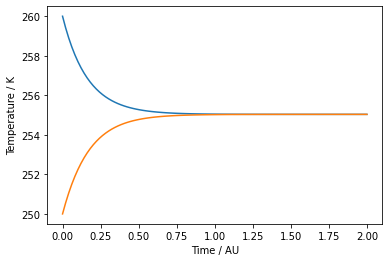

In [ ]:
#Exercise 16.1

L = 1361 # solar constant
a = 0.295 # reflectivity
s = 5.67e-8 # stefan-boltzmann constant
C = 5.3e8 # effective heat capacity
t = np.linspace(0,3,100) # time
h = t[1] - t[0] # time delta
inflow = (L * (1 - a))/4

def temp(T0):
    t = np.linspace(0,2,100)
    T = np.zeros(len(t))
    for i in range(len(T) - 1):
        T[0] = T0
        T[i + 1] = T[i] + h * (inflow - (s * T[i] ** 4))
    plt.plot(t, T)
    plt.xlabel("Time / AU")
    plt.ylabel("Temperature / K")

temp(260)
temp(250)

In [ ]:
#Exercise 16.2

T_equil = (inflow / s) ** (1/4) # rearrange inflow = outflow for T
print("The equillibrium temperature is", T_equil - 273.15, "degrees Celcius")


The equillibrium temperature is -18.114258547957263 degrees Celcius


The calculated value for the equilibrium temperature is significantly lower than any expected, realistic value. This can be attributed to the fact that the model that I have used is lacking the insulating effects of an atmosphere, meaning the calculated value for "energy out" is larger than in reality. This results a lower equilibrium temperature, as this is the temperature at which energy in - energy out = 0.


In [ ]:
#Exercise 16.3

T = 13.9 + 273.15 # converting current temperature to Kelvin
num = 4 * s * T ** 4
den = L * (1 - a)
g = (num/den) - 1
print("g = ", g)

g =  0.604818835093891


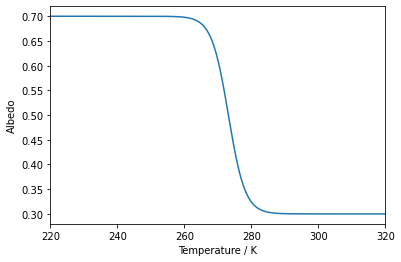

In [ ]:
#Exercise 16.4

def albedo(T):
    return A + (((B-A) * np.exp(k * (T - Tm)))/(1 + np.exp(k * (T - Tm))))

def energy_in(T):
    a = albedo(T)
    return (L * (1 - a)) / 4

T = np.linspace(220,340,10000) # Temperatures; range goes up to 340 for 16.6
A = 0.3
B = 0.7
k = -0.4
Tm = 273.15
a = albedo(T)

plt.plot(T, a)
plt.xlabel('Temperature / K')
plt.ylabel('Albedo')
plt.xlim(220, 320)
plt.show()

In [ ]:
#Exercise 16.5

def energy_out(T,g): # function to find energy out for a given g
    return (s * T ** 4) / (1 + g)

def plot(T,g): # function to create a plot of energy in vs energy out for a given g
    plt.plot(T, energy_out(T, g), 'r', label = "Energy Out")
    plt.plot(T, energy_in(T), 'b', label = "Energy In")
    plt.xlabel('Temperature / K')
    plt.ylabel('Energy')
    print("g =", g)
    plt.legend()
    plt.show()

# choosing g values for plots

g1 = 0.604818835093891 #three equilibria (current conditions)
g2 = 0.55
g3 = 0.5156956956956957 #two equilibria ; method of calculation shown below
g4 = 0.4 #one equilibrium

g = 0.604818835093891


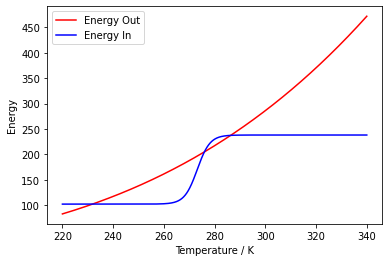

g = 0.55


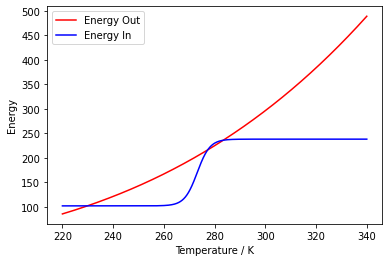

g = 0.5156956956956957


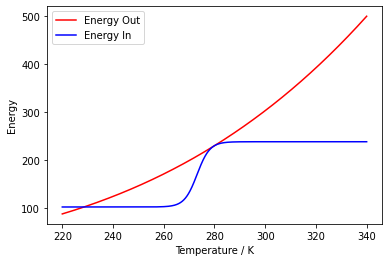

g = 0.4


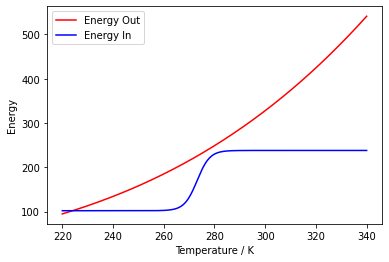

In [ ]:
plot(T, g1)
plot(T, g2)
plot(T, g3)
plot(T, g4)

In [ ]:
def equilibria(T,g): # function to find the equilibria for a given g
    energy_difference = np.sign(energy_in(T) - energy_out(T,g))
    signchange = ((np.roll(energy_difference, 1) - energy_difference) != 0)
    signchange[0] = 0 # becuase it rolls to the other end
    signchange[-1] = 0
    return T[signchange]

print("for g =", g1, "the equilibria are", equilibria(T, g1) - 273.15, "degrees C")
print("for g =", g2, "the equilibria are", equilibria(T, g2) - 273.15, "degrees C")
print("for g =", g3, "the equilibria are", equilibria(T, g3) - 273.15, "degrees C")
print("for g =", g4, "the equilibria are", equilibria(T, g4) - 273.15, "degrees C")

for g = 0.604818835093891 the equilibria are [-41.30481548   2.83559856  13.18063306] degrees C
for g = 0.55 the equilibria are [-43.3090159    4.11972697  10.25234023] degrees C
for g = 0.5156956956956957 the equilibria are [-44.59314431   6.6639814    6.7359886 ] degrees C
for g = 0.4 the equilibria are [-49.08159316] degrees C


In [ ]:
# finding the the value of T, g at the lower (in terms of g) tipping point

ltp = np.linspace(0.5,0.52,1000) # value range for g at tipping point ; based on trial and error
for g in ltp:
    equil = equilibria(T,g)
    if len(equil) > 1: # the first value of g at which there is more than one equilibrium is the closest value of g to the tipping point
        print("at the tipping point, g =", g)
        Ttip = equilibria(T,g)[1]  - 273.15, equilibria(T,g)[2] - 273.15
        print(Ttip)
        break

print("the temperature at the tipping point =", (Ttip[0] + Ttip[1]) / 2, "degrees C")
# taking a mean of the two slightly different values for T at tipping point, which arises from the resolution of T and g

at the tipping point, g = 0.5156956956956957
(6.663981398139811, 6.735988598859876)
the temperature at the tipping point = 6.699984998499843 degrees C


The "goldilocks" equilibrium state calculated in 16.3 has a greenhouse gas content, g, of 0.605 (3DP) and a temperature of 287.05 degrees Kelvin or 13.9 degrees Celcius. In order to describe and understand what happens to the equilibrium of this system as g decreases, we must understand the interactions between the two influences that create the system: energy in and energy out, and how these vary with g. To do this, we can plot the lines for energy in and energy out (equations for both can be found in previous sections) on axes of Energy against Temperature given the Goldilocks conditions, as I have done above, and interpret this. When the 'energy in' line > energy out, dT/dt is positive, so the temperature will increase, and when energy in < energy out, dT/dt is negative, so the temperature will decrease. In the Goldilocks state there are three points at which energy in = energy out (i.e. intersections between "energy in" line and "energy out" line), as shown in the plot for g = 0.605 . These points of intersection are the points of temperature equilibrium, where dT/dt = 0, and they come in two varieties: stable or unstable; which category each point falls into is determined by the energy conditions, and the interactions of the lines at the temperatures surrounding it. Equilibrium points are stable if the energy conditions surrounding them drive the temperature towards them, or unstable if the temperature is driven away.
By examining the Goldilocks figure (g = 0.605) we can see that the two polar equilibria are stable, and the 'equilibria' function reveals that the temperature at these points are -41.3 (snowball earth) and 13.2 degrees Celcius. The middle equilibrium point (2.84 degrees Celcius) is unstable, and which side of this point the temperature falls determines which of the two stable equilibria the temperature is driven towards. How much perturbation it would take to move past the central unstable equilibrium, causing a shift to the other equilibrium, is known as the resilience of the state.
We can see in the subsequent figures (g = 0.55, 0.516), that, as greenhouse gas content decreases, the value of energy out (which is proportional to 1/g) increases, causing the red line to shift upwards.  As a result of this, the equilibria and dynamics of the system change drastically, specifically, the unstable and the higher temperature equilibrium point become closer together, and the lower temperature equilibrium point moves further away. This means that the resilience of system in the goldilocks stable state decreases. Eventually, as g continues to decrease the unstable equilibrium and the higher equilibrium coalesce resulting in an equilibrium point that is attractive from the direction of higher values of T, but repulsive from lower values. This point is referred to as the tipping point, as any further reduction in greenhouse gas content results in only one point of equilibrium (the snowball earth) remaining, causing an extreme and sudden 'tipping' in climate. In this scenario the tipping point is found at g = 0.516 and T = 6.700 C (3DP), which were found using the calculations shown above.
Once g is reduced below the tipping point the temperature will be driven towards the extremely cold equilibrium, as shown in the final figure (g = 0.4), since it is the only one remaining. Thus, changes in greenhouse gas content in the atmosphere can have drastic effects on the climate by causing equilibria to shift, coalesce, or disappear.


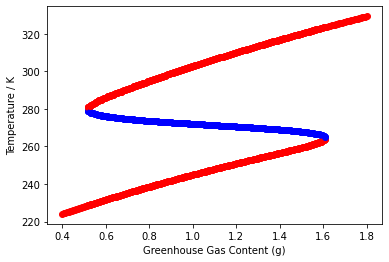

In [ ]:
#Exercise 16.6

g_values = np.linspace(0.4,1.8,200)

for g in g_values:
    eq = equilibria(T,g)
    for i in eq:
        if len(eq) == 3: # to differentiate the colours (prettify)
            plt.plot([g],eq[0],'o', c = 'r')
            plt.plot([g],eq[1],'o', c = 'b')
            plt.plot([g],eq[2],'o', c = 'r')
        else:
            plt.plot([g]*len(eq),eq,'o', c = 'r')
    plt.xlabel('Greenhouse Gas Content (g)')
    plt.ylabel('Temperature / K')

In [ ]:
# finding the the value of g at the upper (g) tipping point

utp = np.linspace(1.62,1.6,1000) # value range for g; based on trial and error
for g in utp:
    equil = equilibria(T,g)
    if len(equil) > 1:
        print(g)
        break

1.6125725725725726


If the Earth begins in a snowball state with g ~ 0.5 and T ~ 227K, what is required to happen for the Earths to return to the Goldilocks state of 287.05K (see 16.3)? In order to answer this question we must understand how the equilibrium temperatures of the planet (see 16.5 for a more in-depths explanation of this) change with atmospheric conditions, specifically greenhouse gas content, g. We can visualise this effect by plotting the equilibrium temperatures for a range of values for g, which produces the figure above.
As we can see, for 0.516 < g < 1.613 (3DP) there are 3 equilibrium points at each value of g, with the two extreme values being stable equilibria (shown in red), and the unstable equilibria in the middle (shown in blue). However, for g values < 0.52 and > 1.62 there is only a single lower and higher equilibrium point respectively, so crossing over these boundary g values would result in a huge and sudden jump in temperature, a climate catastrophe, if the planet previously inhabited the other stable equilibrium. These points are represented in the figure as the boundary between red and blue lines, or when the line changes direction, and they are referred to as the climate tipping points.
We can use these principles to answer our question. If the earth began in a snowball state with g ~ 0.5 and T ~ 227K it would inhabit the bottom left section of the figure, on the lower set of stable equilibria (snowball earth). The only way to return to the goldilocks zone, which is in the higher set of stable equilibria, would be to increase g beyond the upper tipping point of 1.62, causing the Earth's climate to 'leap' to the higher red line. Once the earth inhabited this new, higher set of equilibria, it would be resilient in its position even if g would drop to lower values once again (0.516 < g < 1.613), as it would now be stable in the higher equilibrium point for a given value of g. The only way to return to the lower set of equilibria would be for g to drop below the lower tipping point of 0.516, which would cause a climate catastrophe in the opposite direction (see 16.5).
Therefore, to return to the Goldilocks state it is necessary for greenhouse gas content in the atmosphere to significantly increase, pushing the Earth beyond the tipping point of 1.613. In fact, there is evidence that the Earth once inhabited the snowball equilibria in reality. The necessary increase in greenhouse gas content may have been facilitated by the emission of greenhouse gasses by volcanoes in combination with a reduction in gas uptake by rocks and oceans due to their frozen state. As mentioned earlier, even once oceans thawed and greenhouse gas uptake increased causing a reduction in g, the earth would remain in the higher set of equilibria, firmly in its new Goldilocks position, where it exists currently.
